In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
%matplotlib inline

df = pd.read_csv('./data-extinct.csv', usecols=[0, 1,4, 5, 7, 10, 12, 13])
df = df.rename(
    columns={'Name in English':'language', 'Country codes alpha 3':'locations','Countries':'countries',
             'Degree of endangerment':'risk', 'Number of speakers':'population'})
df.columns = df.columns.str.lower()

subcontinent=df.loc[df.locations.isin(['IND','BTN','NPL','BGD','PAK','LKA','MMR'])]
india = df[df.countries == "India"]

bhutan= df[df.locations == "BTN"]
nepal= df[df.locations== "NPL"]
bangla= df[df.locations == "BGD"]
pak= df[df.locations == "PAK"]
burma= df[df.locations == "MMR"]

sri= df[df.locations == "LKA"]
india.head()

id       language countries locations                   risk  \
7   1586          Gondi     India       IND             Vulnerable   
16  1591  Kurux (India)     India       IND             Vulnerable   
18  1585           Tulu     India       IND             Vulnerable   
19  1556         Kangdi     India       IND  Definitely endangered   
26  1227        Meithei     India       IND             Vulnerable   

    population  latitude  longitude  
7    2713790.0   19.5804    80.4418  
16   1751489.0   22.1467    85.2758  
18   1722768.0   12.0178    75.7067  
19   1700000.0   32.4356    76.1242  
26   1250000.0   24.7667    93.8946

In [106]:
india.risk.value_counts()

Vulnerable               66
Definitely endangered    45
Critically endangered    40
Extinct                   6
Severely endangered       6
Name: risk, dtype: int64

In [107]:
india_vul=india.loc[india.risk=='Vulnerable',:]
india_endanger=india.loc[india.risk=='Definitely endangered ',:]
india_critical=india.loc[india.risk=='Critically endangered',:]
india_extinct=india.loc[india.risk=='Extinct',:]
india_severe=india.loc[india.risk=='Severely endangered',:]

india_vul.head()

id       language countries locations        risk  population  latitude  \
7   1586          Gondi     India       IND  Vulnerable   2713790.0   19.5804   
16  1591  Kurux (India)     India       IND  Vulnerable   1751489.0   22.1467   
18  1585           Tulu     India       IND  Vulnerable   1722768.0   12.0178   
26  1227        Meithei     India       IND  Vulnerable   1250000.0   24.7667   
33  1577            Kui     India       IND  Vulnerable    916222.0   19.5908   

    longitude  
7     80.4418  
16    85.2758  
18    75.7067  
26    93.8946  
33    83.9575

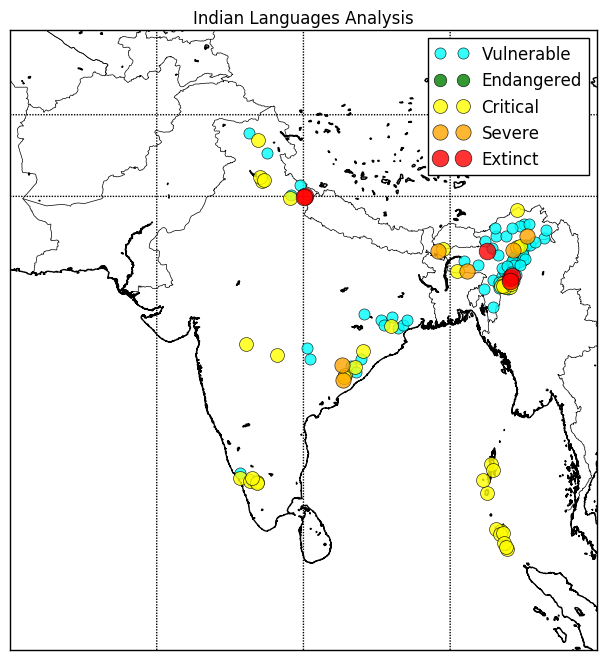

In [108]:
#TODO :Indian map has been changed to not include gilgit POK?
plt.figure(figsize=(15,8))
m = Basemap(projection='mill',llcrnrlat=0,urcrnrlat=40,\
            llcrnrlon=60,urcrnrlon=100,resolution='h')
m.drawparallels(np.arange(30.,60.,5.))
m.drawmeridians(np.arange(60.,100.,10.))
m.drawcoastlines()
m.drawcountries()
colors = ['cyan','green','yellow','orange','red']

x, y = m(list(india_vul["longitude"].astype(float)), list(india_vul["latitude"].astype(float)))
plot1=m.plot(x, y, 'go', markersize = 8, alpha = 0.8, color = colors[0],label='Vulnerable')

x, y = m(list(india_endanger["longitude"].astype(float)), list(india_endanger["latitude"].astype(float)))
plot2=m.plot(x, y, 'go', markersize = 9, alpha = 0.8, color =colors[1],label='Endangered')


x, y = m(list(india_critical["longitude"].astype(float)), list(india_critical["latitude"].astype(float)))
plot3=m.plot(x, y, 'go', markersize = 10, alpha = 0.8, color = colors[2],label='Critical')


x, y = m(list(india_severe["longitude"].astype(float)), list(india_severe["latitude"].astype(float)))
plot4=m.plot(x, y, 'go', markersize = 11, alpha = 0.8, color = colors[3],label='Severe')


x, y = m(list(india_extinct["longitude"].astype(float)), list(india_extinct["latitude"].astype(float)))
plot5=m.plot(x, y, 'go', markersize = 12, alpha = 0.8, color = colors[4],label='Extinct')


plt.title('Indian Languages Analysis')
plt.legend()
plt.show()



Kashmir valley , Northwest area ,Uttarakhand ,Madhya pradesh parts of Karnataka Orissa and Andaman Nicobar 
islands seem to have languages that are vulnerable or endangered. Not too many languages that are extinct or severe.

In [109]:
subcontinent_vul=subcontinent.loc[subcontinent.risk=='Vulnerable',:]
subcontinent_endanger=subcontinent.loc[subcontinent.risk=='Definitely endangered ',:]
subcontinent_critical=subcontinent.loc[subcontinent.risk=='Critically endangered',:]
subcontinent_extinct=subcontinent.loc[subcontinent.risk=='Extinct',:]
subcontinent_severe=subcontinent.loc[subcontinent.risk=='Severely endangered',:]
subcontinent_vul.head()

id       language countries locations        risk  population  latitude  \
7   1586          Gondi     India       IND  Vulnerable   2713790.0   19.5804   
16  1591  Kurux (India)     India       IND  Vulnerable   1751489.0   22.1467   
18  1585           Tulu     India       IND  Vulnerable   1722768.0   12.0178   
26  1227        Meithei     India       IND  Vulnerable   1250000.0   24.7667   
33  1577            Kui     India       IND  Vulnerable    916222.0   19.5908   

    longitude  
7     80.4418  
16    85.2758  
18    75.7067  
26    93.8946  
33    83.9575

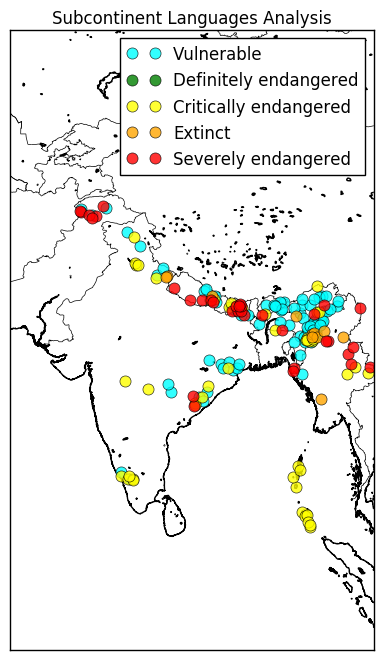

In [112]:
from pylab import rcParams

rcParams['figure.figsize'] = 30, 30
plt.figure(figsize=(15,8))
m = Basemap(projection='mill',llcrnrlat=-5,urcrnrlat=50,\
            llcrnrlon=65,urcrnrlon=100,resolution='h')

m.drawcoastlines()
m.drawcountries()
colors = ['cyan','green','yellow','orange','red']

x, y = m(list(subcontinent_vul["longitude"].astype(float)), list(subcontinent_vul["latitude"].astype(float)))
plot1=m.plot(x, y, 'go', markersize = 8, alpha = 0.8, color = colors[0],label='Vulnerable')


x, y = m(list(subcontinent_endanger["longitude"].astype(float)), list(subcontinent_endanger["latitude"].astype(float)))
plot2=m.plot(x, y, 'go', markersize = 8, alpha = 0.8, color = colors[1],label='Definitely endangered')

x, y = m(list(subcontinent_critical["longitude"].astype(float)), list(subcontinent_critical["latitude"].astype(float)))
plot3=m.plot(x, y, 'go', markersize = 8, alpha = 0.8, color = colors[2],label='Critically endangered')

x, y = m(list(subcontinent_extinct["longitude"].astype(float)), list(subcontinent_extinct["latitude"].astype(float)))
plot4=m.plot(x, y, 'go', markersize = 8, alpha = 0.8, color = colors[3],label='Extinct')

x, y = m(list(subcontinent_severe["longitude"].astype(float)), list(subcontinent_severe["latitude"].astype(float)))
plot1=m.plot(x, y, 'go', markersize = 8, alpha = 0.8, color = colors[4],label='Severely endangered')


plt.title('Subcontinent Languages Analysis')
plt.legend()

plt.show()


In [111]:
e

id           language countries locations                   risk  \
275   1137                Mru   Myanmar       MMR    Severely endangered   
403   2224                Yaw   Myanmar       MMR  Definitely endangered   
812   2218    Anung (Myanmar)   Myanmar       MMR    Severely endangered   
815    554      Sak (Myanmar)   Myanmar       MMR             Vulnerable   
904   2223  Laomian (Myanmar)   Myanmar       MMR  Definitely endangered   
1161   521              Danaw   Myanmar       MMR  Critically endangered   
1183   528               Kadu   Myanmar       MMR    Severely endangered   
1380   522              Ganan   Myanmar       MMR    Severely endangered   
1625   520             Chawte   Myanmar       MMR  Definitely endangered   
2364  2219               Hpun   Myanmar       MMR                Extinct   
2419   540              Malin   Myanmar       MMR                Extinct   
2473   551                Pyu   Myanmar       MMR                Extinct   
2496   560              Taman   Myanmar       MMR                Extinct   
2546  2478              Angku   Myanmar       MMR  Critically endangered   
2577  2474                 En   Myanmar       MMR  Critically endangered   
2654  2470            Palaung   Myanmar       MMR    Severely endangered   
2655  2471               Pale   Myanmar       MMR    Severely endangered   
2667  2472              Riang   Myanmar       MMR  Critically endangered   
2669  2473              Rumai   Myanmar       MMR    Severely endangered   
2687  2476             Tailoi   Myanmar       MMR  Critically endangered   
2709  2475                 Wa   Myanmar       MMR    Severely endangered   

      population  latitude  longitude  
275      40000.0   21.7748    92.2741  
403      20000.0   21.6000    94.8333  
812       3500.0   27.2000    98.6333  
815       3500.0   21.2333    93.0761  
904       2500.0   22.6833    99.2500  
1161      1000.0   21.1920    97.3937  
1183      1000.0   24.2042    95.6332  
1380       500.0   24.2317    95.3778  
1625       200.0   24.1918    94.2736  
2364         0.0   24.6500    97.0666  
2419         0.0   24.5700    94.5600  
2473         0.0   18.9424    94.8751  
2496         0.0   25.1651    95.2514  
2546         NaN   21.4888   100.8325  
2577         NaN   21.2872    99.4816  
2654         NaN   23.1058    97.4880  
2655         NaN   22.1511    97.8386  
2667         NaN   21.9048    98.2342  
2669         NaN   23.7363    97.9927  
2687         NaN   21.4275   100.7473  
2709         NaN   21.8705    99.6519